<a href="https://colab.research.google.com/github/MShooshtari/Fraud-Detection/blob/master/Improve_Fastai_Road_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving FastAI Image Segmentation model for Road Detection.

I am following this paper: 

__City-scale Road Extraction from Satellite Imagery__

https://arxiv.org/abs/1904.09901

## Getting our data
For this tutorial, we will use the CVPR18 data-set which is a really high-quality road-segmentation data-set provided by the University of Cambridge.
Another nice thing about the data-set is that we don’t need to download it manually because it is included in the FastAI library and so we can simply download it using the untar_data method.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from fastai.vision import *
from pathlib import Path
# path = untar_data(URLs.CAMVID, dest=Path('/content/newd_data.tar.gz'))
# print(path.ls()) # prints subdirectories

path = Path('/content/drive/My Drive/CVPR18_Road_Detection_train_separated') #untar_data(url_address)
print(path.ls()) # prints subdirectories

[PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/images'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/codes.txt'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/labels'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/.ipynb_checkpoints'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/valid.txt'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/CVPR18_road_model.pth'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/CVPR18_road_model_updated.pth'), PosixPath('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/CVPR18_road_model_new.pth')]


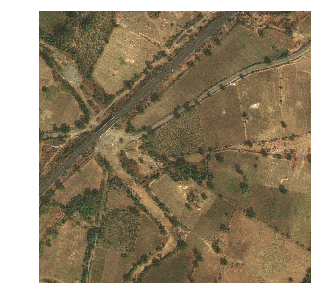

In [3]:
import os 
path_lbl = path/'labels'
path_img = path/'images'

fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

# open and show image
img_f = fnames[25]
img = open_image(img_f)
img.show(figsize=(5, 5))

In [4]:
get_y_fn = lambda x: path_lbl/os.path.basename(x).replace('_sat.jpg', '_mask.png')

print(get_y_fn(img_f))

/content/drive/My Drive/CVPR18_Road_Detection_train_separated/labels/854913_mask.png


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
tensor(1)


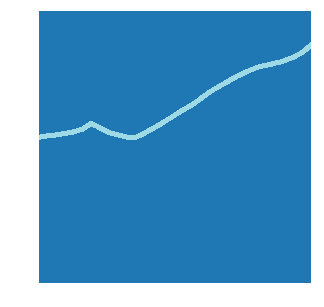

In [5]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5, 5), alpha=1)
print(mask.data)
print(mask.data.max())

In [6]:
codes = np.loadtxt(path/'codes.txt', dtype=str) # Load data codes

src_size = np.array(mask.shape[1:])
size = src_size//2
bs = 5

src = (SegmentationItemList.from_folder(path_img)
       # Load in x data from folder
       .split_by_fname_file(path/'valid.txt')
       # Split data into training and validation set 
       .label_from_func(get_y_fn, classes=codes)
       # Label data using the get_y_fn function
       
)

data = (src.transform(get_transforms(), size=size, tfm_y=True)
        # Flip images horizontally 
        .databunch(bs=bs)
        # Create a databunch
        .normalize(imagenet_stats)
        # Normalize for resnet
)
print(type(data))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

<class 'fastai.vision.data.ImageDataBunch'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

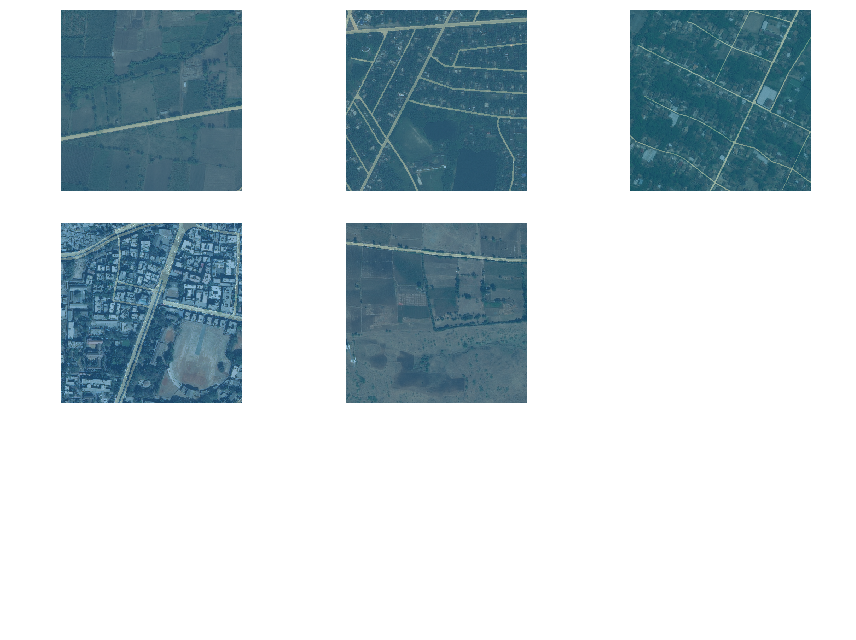

In [7]:
data.show_batch(rows=3, figsize=(12, 9), ds_type=DatasetType.Valid)

In [8]:
name2id = {v:k for k,v in enumerate(codes)}
print(name2id)
# void_code = name2id['Background']

def acc_camvid(input, target):
    # target = target.squeeze(1)
    mask = target #!= void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

{'Background': 0, 'Road': 1}


In [9]:
learn = unet_learner(data, models.resnet34, metrics=dice, wd=1e-2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 116MB/s]
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

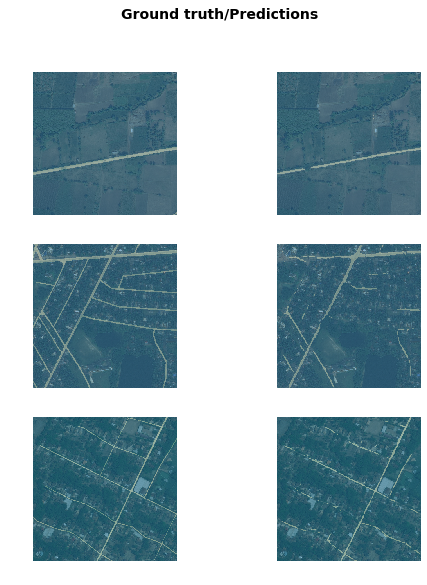

In [10]:
learn.load('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/CVPR18_road_model') # Load a saved model
learn.show_results(rows=3, figsize=(8, 9)) # show results

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

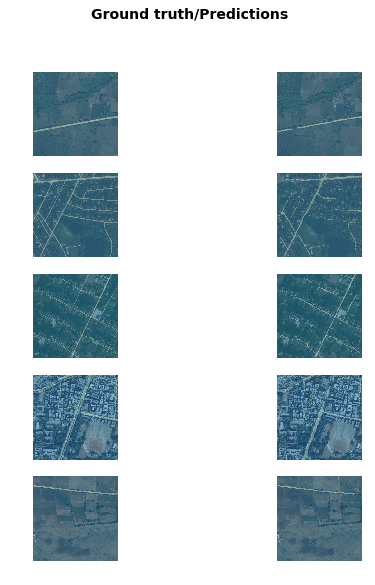

In [11]:
learn.load('/content/drive/My Drive/CVPR18_Road_Detection_train_separated/CVPR18_road_model_updated') # Load a saved model
learn.show_results(rows=5, figsize=(8, 9)) # show results

In [0]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize


In [0]:
def improve_prediction(pred_idx):
  print(pred_idx.shape)
  M = pred_idx.numpy().astype(float)
  threshold=100
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(M, cv2.MORPH_OPEN, kernel)*255
  opening = cv2.blur(opening,(3,3))
  kernel = np.ones((25,25),np.uint8)
  closing = cv2.morphologyEx(M, cv2.MORPH_CLOSE, kernel)*255
  closing = cv2.blur(closing,(3,3))

  M[opening>threshold] = 255
  M[closing>threshold] = 255
  M[M!=255]=0
  M = M/255
  skeleton = skeletonize(M)*255
  skeleton = cv2.blur(skeleton,(9,9))
  skeleton[skeleton>0] = 255
  return skeleton





/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


torch.Size([512, 512])
(512, 512)


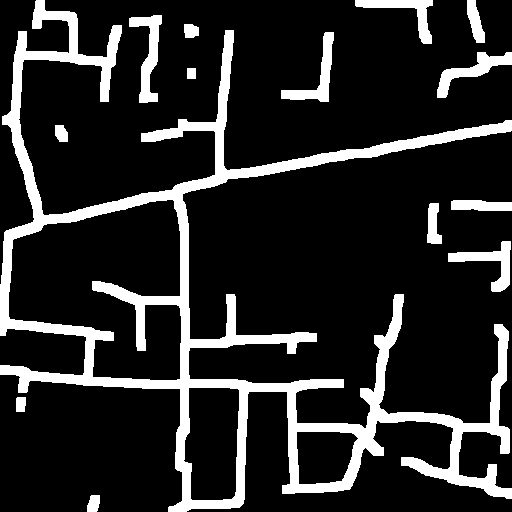

In [23]:
import numpy as np 
image_address = '/content/drive/My Drive/CVPR18_Road_Detection_train_separated/images/340497_sat.jpg'
label_address = '/content/drive/My Drive/CVPR18_Road_Detection_train_separated/labels/340497_mask.png'
new_img = open_image(image_address)
pred_class, pred_idx, outputs = learn.predict(new_img)
new_img.save('/content/sample_data/340497_sat.jpg')
Image(pred_idx).save('/content/sample_data/340497_mask.png')
pred_image = improve_prediction(pred_idx[0])
cv2_imshow(pred_image)


In [21]:
batch = data.one_batch()
print(len(batch))
print(type(batch))
pred_list = learn.pred_batch(batch)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

2
<class 'tuple'>


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

0
torch.Size([512, 512])
torch.Size([512, 512])
(512, 512)


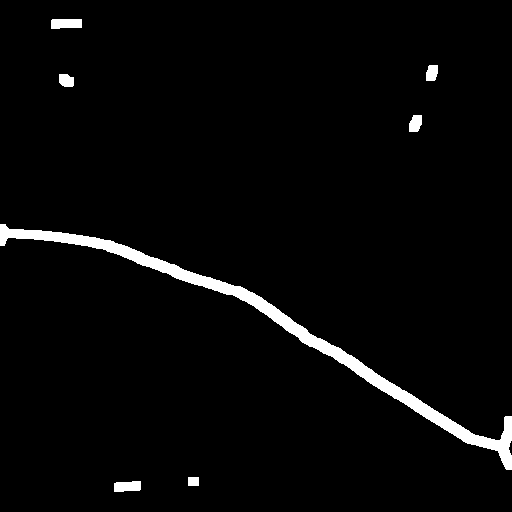

1
torch.Size([512, 512])
torch.Size([512, 512])
(512, 512)


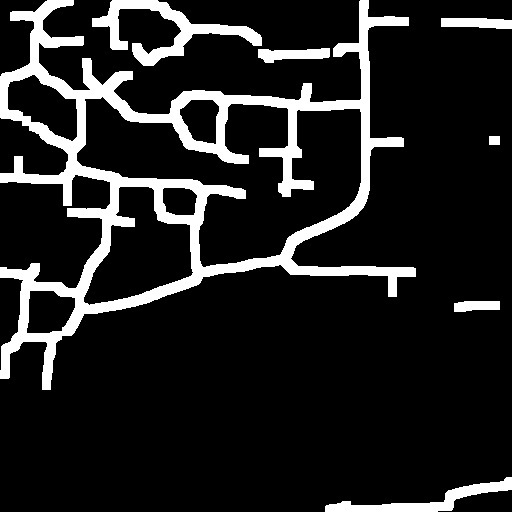

2
torch.Size([512, 512])
torch.Size([512, 512])
(512, 512)


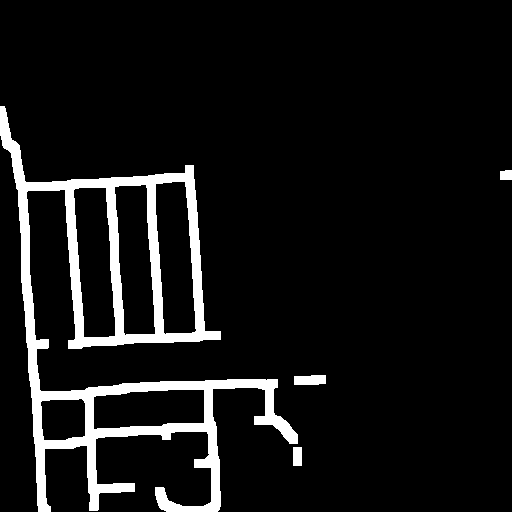

3
torch.Size([512, 512])
torch.Size([512, 512])
(512, 512)


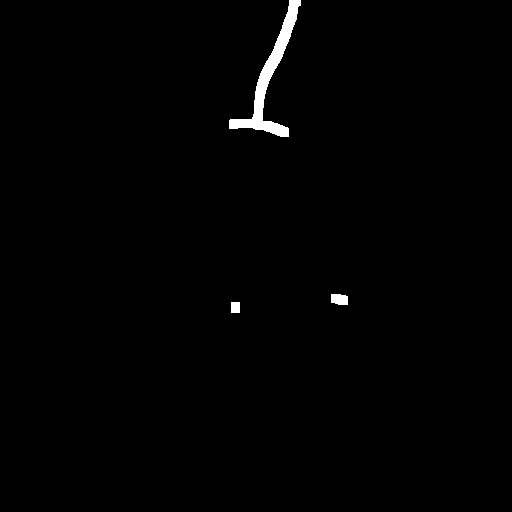

4
torch.Size([512, 512])
torch.Size([512, 512])
(512, 512)


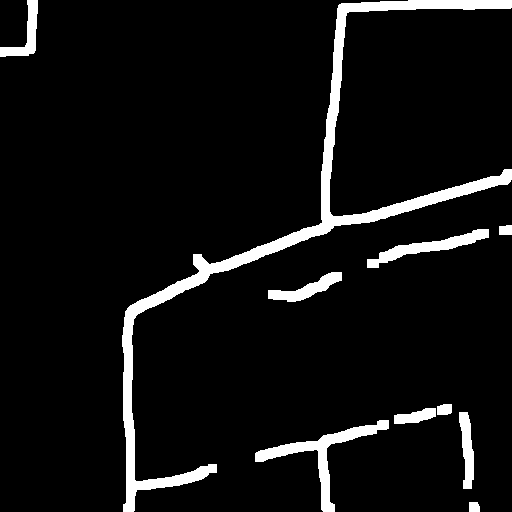

In [22]:
for i in range(bs):
  print(i)
  temp_image = pred_list[i][0]
  temp_label = pred_list[i][1]
  print(temp_label.shape)
  pred_image = improve_prediction(temp_label)
  cv2_imshow(pred_image)

In [0]:
batch = data.one_batch()
train = batch[0]
label = batch[1]
print(train[0].shape)
print(label[0].numpy()[0].shape)
